In [ ]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('p2').getOrCreate()
spark

In [ ]:
data=spark.read.csv('/content/customer_data - customer_data.csv',header=True,inferSchema=True)
data

DataFrame[CustomerID: int, Age: int, Annual_Income: int, Spending_Score: int]

In [ ]:
data.show(3)

+----------+---+-------------+--------------+
|CustomerID|Age|Annual_Income|Spending_Score|
+----------+---+-------------+--------------+
|         1| 19|        15000|            39|
|         2| 21|        18000|            81|
|         3| 20|        19000|             6|
+----------+---+-------------+--------------+
only showing top 3 rows



In [ ]:
data.printSchema()

root
 |-- CustomerID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual_Income: integer (nullable = true)
 |-- Spending_Score: integer (nullable = true)



In [ ]:
data=data.dropna()
data.show()

+----------+---+-------------+--------------+
|CustomerID|Age|Annual_Income|Spending_Score|
+----------+---+-------------+--------------+
|         1| 19|        15000|            39|
|         2| 21|        18000|            81|
|         3| 20|        19000|             6|
|         4| 23|        22000|            77|
|         5| 31|        25000|            40|
|         6| 22|        17000|            76|
|         7| 35|        20000|            94|
|         8| 40|        27000|             3|
|         9| 23|        29000|            72|
|        10| 28|        30000|            14|
+----------+---+-------------+--------------+



In [ ]:
features=["Age","Annual_Income","Spending_Score"]
from pyspark.ml.feature import VectorAssembler
assembler=VectorAssembler(inputCols=features,outputCol="features")
final_data=assembler.transform(data)
final_data

DataFrame[CustomerID: int, Age: int, Annual_Income: int, Spending_Score: int, features: vector]

In [ ]:
from pyspark.ml.clustering import KMeans
kmeans=KMeans(k=3,seed=1,featuresCol="features",predictionCol="cluster")
model=kmeans.fit(final_data)
model

KMeansModel: uid=KMeans_98b3929ecd92, k=3, distanceMeasure=euclidean, numFeatures=3

In [ ]:
model.summary.trainingCost

32008063.666666664

In [ ]:
model.clusterCenters()

[array([   23.33333333, 18500.        ,    62.16666667]),
 array([2.55e+01, 2.95e+04, 4.30e+01]),
 array([3.55e+01, 2.60e+04, 2.15e+01])]

In [ ]:
pred=model.transform(final_data)
pred.select("Age","Annual_Income","Spending_Score","cluster").show()

+---+-------------+--------------+-------+
|Age|Annual_Income|Spending_Score|cluster|
+---+-------------+--------------+-------+
| 19|        15000|            39|      0|
| 21|        18000|            81|      0|
| 20|        19000|             6|      0|
| 23|        22000|            77|      0|
| 31|        25000|            40|      2|
| 22|        17000|            76|      0|
| 35|        20000|            94|      0|
| 40|        27000|             3|      2|
| 23|        29000|            72|      1|
| 28|        30000|            14|      1|
+---+-------------+--------------+-------+



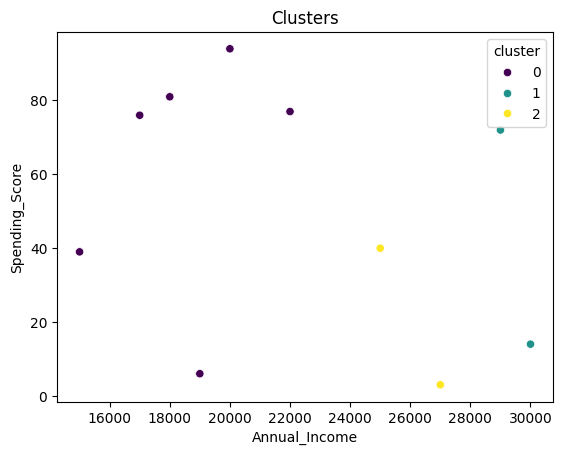

In [ ]:
pandas_df=pred.select("Annual_Income","Spending_Score","cluster").toPandas()
pandas_df
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=pandas_df,x="Annual_Income",y="Spending_Score",hue='cluster',palette='viridis')
plt.title('Clusters')
plt.show()